In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# 8 different cols corresponds to f_{++-}, ..., f_{-+-};
target = np.array([[1, 1, -1, -1, 1, 1, -1, -1],
                   [1, 1, -1, -1, -1, -1, 1, 1],
                   [-1, 1, -1, 1, 1, -1, 1, -1]])

# cleaner input later

# mean vector and covariance matrix from Binhao and Jingde's script

mean = np.array([93.75, 93.75, 93.75, 93.75, 31.25, 31.25, 31.25, 31.25])

cov = np.array([[ 76.171875, -17.578125, -17.578125, -17.578125,  -5.859375,
         -5.859375,  -5.859375,  -5.859375],
       [-17.578125,  76.171875, -17.578125, -17.578125,  -5.859375,
         -5.859375,  -5.859375,  -5.859375],
       [-17.578125, -17.578125,  76.171875, -17.578125,  -5.859375,
         -5.859375,  -5.859375,  -5.859375],
       [-17.578125, -17.578125, -17.578125,  76.171875,  -5.859375,
         -5.859375,  -5.859375,  -5.859375],
       [ -5.859375,  -5.859375,  -5.859375,  -5.859375,  29.296875,
         -1.953125,  -1.953125,  -1.953125],
       [ -5.859375,  -5.859375,  -5.859375,  -5.859375,  -1.953125,
         29.296875,  -1.953125,  -1.953125],
       [ -5.859375,  -5.859375,  -5.859375,  -5.859375,  -1.953125,
         -1.953125,  29.296875,  -1.953125],
       [ -5.859375,  -5.859375,  -5.859375,  -5.859375,  -1.953125,
         -1.953125,  -1.953125,  29.296875]])

# rv = np.random.multivariate_normal(mean, cov).reshape((8, 1))
# print(rv) # sample from multivariate gaussian 

In [54]:
'''
CALCULATING OPTIMAL (theta_A)(theta_B) FROM RANDOM SAMPLE
'''

rv = np.random.multivariate_normal(mean, cov).reshape((8, 1))

# no need to scale random sample anymore
scales = [1] # scales = np.linspace(1, 25, num=5)

for scale in scales: # for scale in scales:

  scaled_rv = (scale * rv).astype(int)
  print("random sample", scaled_rv.T)

  count_pos, count_neg = 0, 0

  for i in range(0, 8):
    if target[0][i] * target[1][i] == 1:
      count_pos += scaled_rv[i][0]
    else:
      count_neg += scaled_rv[i][0]

  solution = 0

  # analytic computation for optimal (T_A)(T_B)
  if count_pos >= count_neg:
    solution = (count_pos - count_neg)/(count_pos + count_neg)
  else:
    solution = 0

  print("optimal (T_A)(T_B)  ", solution) # (T_A)(T_B) maximizing likelihood

random sample [[ 91  87 102 104  28  34  22  28]]
optimal (T_A)(T_B)   0.5483870967741935


mean:     0.505998676844325
variance: 0.0015469919337703461


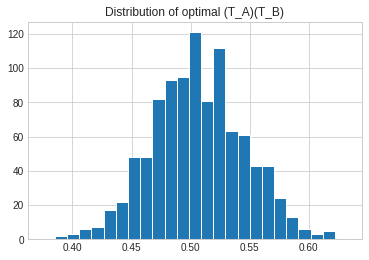

In [52]:
'''
OBSERVING DISTRIBUTION OF OPTIMAL (theta_A)(theta_B)
'''

# rv = np.random.multivariate_normal(mean, cov).reshape((8, 1))
optimal_vals = []

# no need to scale random sample anymore
scale = 1 # scales = np.linspace(1, 25, num=5)

for i in range(1000): # for scale in scales:

  rv = np.random.multivariate_normal(mean, cov).reshape((8, 1))

  scaled_rv = (scale * rv).astype(int)
  #print("scaled random sample", scaled_rv.T)

  count_pos, count_neg = 0, 0

  for i in range(0, 8):
    if target[0][i] * target[1][i] == 1:
      count_pos += scaled_rv[i][0]
    else:
      count_neg += scaled_rv[i][0]

  solution = 0

  # analytic computation for optimal (T_A)(T_B)
  if count_pos >= count_neg:
    solution = (count_pos - count_neg)/(count_pos + count_neg)
  else:
    solution = 0

  optimal_vals.append(solution)
  #print("optimal (T_A)(T_B)  ", solution, "\n") # (T_A)(T_B) maximizing likelihood

print("mean:    ", np.mean(optimal_vals))
print("variance:", np.var(optimal_vals))

plt.hist(optimal_vals, bins = 25, edgecolor = 'white')
plt.title('Distribution of optimal (T_A)(T_B)')
plt.show()